In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import glob 
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df_polkadot=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Polkadot.csv")
df_bitcoin=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Bitcoin.csv") 


In [3]:
df_polkadot.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Polkadot,DOT,2020-08-21 23:59:59,3.090093,2.730919,2.896923,2.875028,4.931314e+07,0.0
1,2,Polkadot,DOT,2020-08-22 23:59:59,4.510613,2.816762,2.878570,4.484690,4.858011e+08,0.0
2,3,Polkadot,DOT,2020-08-23 23:59:59,4.487058,3.716271,4.487058,3.967066,3.207495e+08,0.0
3,4,Polkadot,DOT,2020-08-24 23:59:59,4.783158,3.812670,3.987413,4.602614,4.076902e+08,0.0
4,5,Polkadot,DOT,2020-08-25 23:59:59,5.760775,4.501223,4.584953,5.523393,8.988475e+08,0.0


In [4]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_polkadot['Date'] = pd.to_datetime(df_polkadot['Date'])

df_merged = pd.merge(df_bitcoin, df_polkadot, on='Date', suffixes=('_btc', '_DOT'))
btc_precio = df_merged['High_btc']
dot_precio = df_merged['High_DOT']

corr, _ = pearsonr(btc_precio, dot_precio)
print(f"Coeficiente  entre BTC y ADA: {corr}")

Coeficiente  entre BTC y ADA: 0.9496634556824854


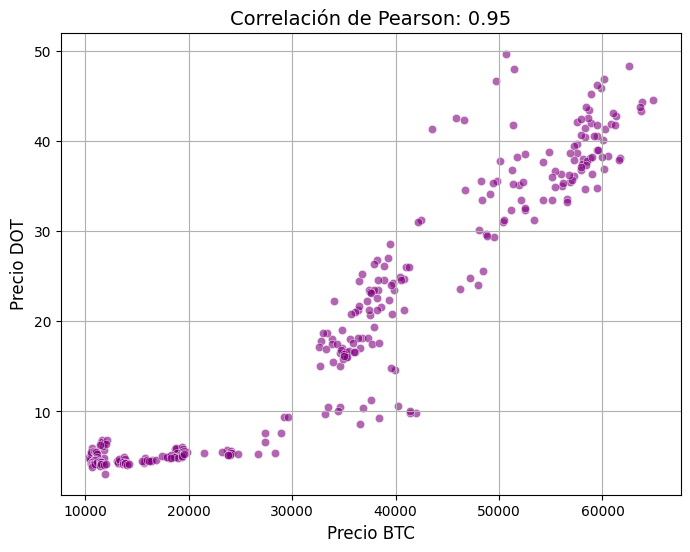

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=btc_precio, y=dot_precio, color='purple', alpha=0.6)
plt.title(f'Correlación de Pearson: {corr:.2f}', fontsize=14)
plt.xlabel('Precio BTC', fontsize=12)
plt.ylabel('Precio DOT', fontsize=12)
plt.grid(True)
plt.show()

In [6]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_polkadot['Date'] = pd.to_datetime(df_polkadot['Date'])

start_date = '2020-08-21 23:59:59'
df_btc_filtered = df_bitcoin[df_bitcoin['Date'] >= start_date]
df_dot_filtered = df_polkadot[df_polkadot['Date'] >= start_date]

df_merged = pd.merge(df_bitcoin, df_polkadot, on='Date', suffixes=('_btc', '_dot'))
df_merged['btc_change'] = df_merged['Close_btc'].diff()
df_merged['dot_change'] = df_merged['Close_dot'].diff()

btc_up_dates = df_merged[df_merged['btc_change'] > 0]['Date']
dot_up_dates = df_merged[df_merged['dot_change'] > 0]['Date']

time_diffs = []
for btc_date in btc_up_dates:
    nearest_dot_date = dot_up_dates.iloc[(dot_up_dates - btc_date).abs().argmin()]
    time_diff = abs((nearest_dot_date - btc_date).days)
    time_diffs.append({'BTC Date': btc_date, 'DOT Date': nearest_dot_date, 'Tiempo de diferencia (dias)': time_diff})

time_diffs_df = pd.DataFrame(time_diffs)
print(time_diffs_df)

               BTC Date            DOT Date  Tiempo de diferencia (dias)
0   2020-08-22 23:59:59 2020-08-22 23:59:59                            0
1   2020-08-24 23:59:59 2020-08-24 23:59:59                            0
2   2020-08-26 23:59:59 2020-08-26 23:59:59                            0
3   2020-08-28 23:59:59 2020-08-28 23:59:59                            0
4   2020-08-30 23:59:59 2020-08-31 23:59:59                            1
..                  ...                 ...                          ...
172 2021-06-29 23:59:59 2021-06-29 23:59:59                            0
173 2021-07-02 23:59:59 2021-07-02 23:59:59                            0
174 2021-07-03 23:59:59 2021-07-03 23:59:59                            0
175 2021-07-04 23:59:59 2021-07-04 23:59:59                            0
176 2021-07-06 23:59:59 2021-07-06 23:59:59                            0

[177 rows x 3 columns]
